In [1]:
import numpy as np
import pandas as pd

# KNeighborsClassifier
# RandomForestClassifier
# SGDClassifier + StratifiedKFold

In [2]:
heart_data = pd.read_csv("./heart.csv")
o2_saturation_data = pd.read_csv("./o2Saturation.csv")

In [3]:
# cp, restecg

heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
o2_saturation_data.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [11]:
heart_data.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

heart_data_pre_train, heart_data_test = train_test_split(heart_data, 0.2)
heart_data_train, heart_data_valid = train_test_split(heart_data_pre_train, 0.25)

heart_data_train.head()

TypeError: Singleton array array(0.2) cannot be considered a valid collection.

In [13]:
o2_saturation_data.count()

98.6    3585
dtype: int64

In [16]:
heart_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


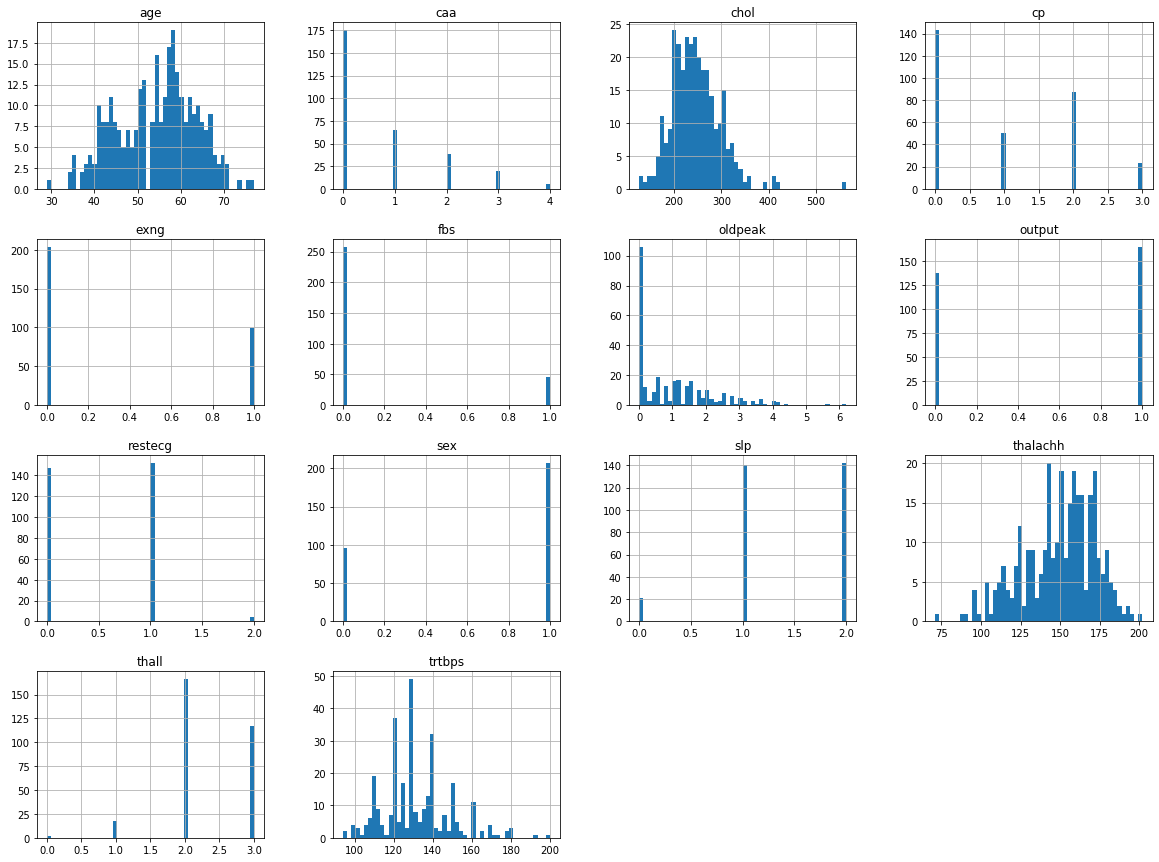

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
heart_data.hist(bins=50, figsize=(20,15))
# save_fig("attribute_heart_attack_plots")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc93b04bf50>,
      dtype=object)

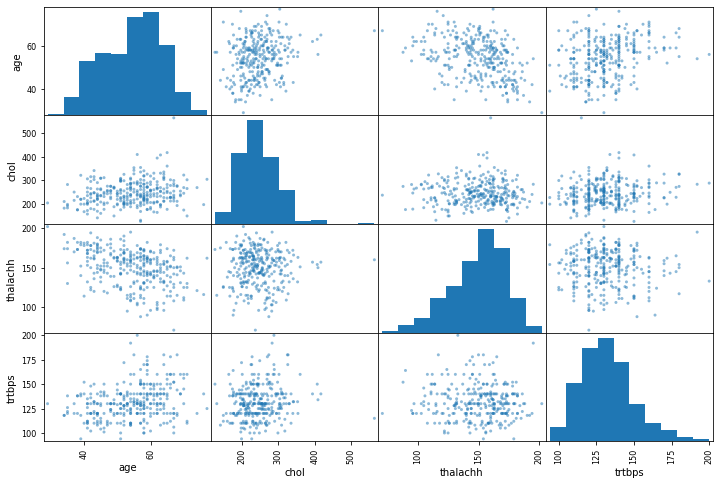

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["age", "chol", "thalachh", "trtbps"]
scatter_matrix(heart_data[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")